In [11]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import csv
 

In [12]:
class SMABacktester():
    def __init__(self,symbol,SMA_S,SMA_L,start,end):
        self.symbol=symbol
        self.SMA_S=SMA_S
        self.SMA_L=SMA_L
        self.start=start
        self.end=end
        self.results=None
        self.get_data()
        
    def get_data(self):
        df=yf.download(self.symbol,start=self.start,end=self.end)
        data=df.Close.to_frame()
        data["returns"]=np.log(data.Close.div(data.Close.shift(1)))
        data["SMA_S"]=data.Close.rolling(self.SMA_S).mean()
        data["SMA_L"]=data.Close.rolling(self.SMA_L).mean()
        data.dropna(inplace=True)
        self.data2=data
    
        return data
    def test_results(self):
        data=self.data2.copy().dropna()
        data["position"]=np.where(data["SMA_S"]>data["SMA_L"],1,-1)
        data["strategy"]=data["returns"]*data.position.shift(1)
        data.dropna(inplace=True)
        data["returnsb&h"]=data["returns"].cumsum().apply(np.exp)
        data["returnstrategy"]=data["strategy"].cumsum().apply(np.exp)
        perf=data["returnstrategy"].iloc[-1]
        outperf=perf-data["returnsb&h"].iloc[-1]
        self.results=data                                 
                                         
        ret=np.exp(data["strategy"].sum())
        std=data["strategy"].std()*np.sqrt(252)
    
        #return ret,std
        return round(perf,6), round(outperf,6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test Please")
        else:
            title="{}| SMA_S{} | SMA_L{}".format(self.symbol,self.SMA_S,self.SMA_L)
            self.results[["returnsb&h","returnstrategy"]].plot(title=title ,figsize=(12,8))

In [13]:
tester = SMABacktester("SPY",50,100,"2000-01-01","2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [14]:
tester.test_results()

(2.592726, 0.297824)

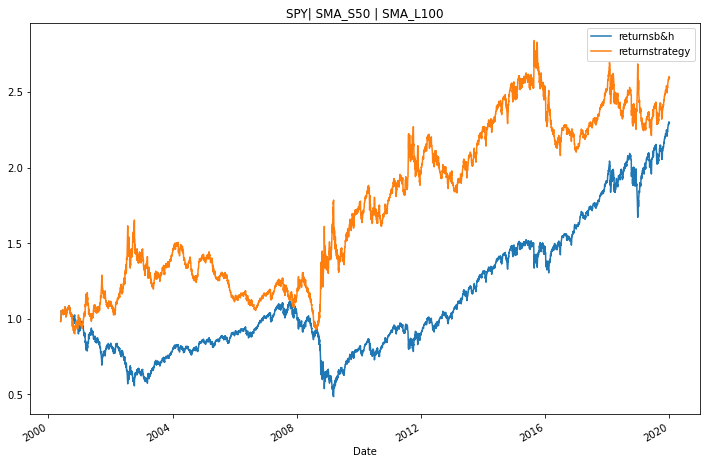

In [15]:
tester.plot_results()